In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
raw = pd.read_excel('data/simplified_book_list.xlsx')

In [13]:
raw.head()

,Title,Author l-f,Additional Authors,ISBN,ISBN13,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Year Read,user_genre,fiction_status,user_tags,ownership_status,buy?
0,Blubber,"Blume, Judy",NaN,NaN,NaN,Macmillan Children's Books,Paperback,127.0,2006.0,1974.0,2007.0,NaN,NaN,NaN,NaN,y
1,The Secret Garden,"Burnett, Frances Hodgson",NaN,0517189607,9.780517e+12,Children's Classics,Hardcover,331.0,1998.0,1911.0,2007.0,NaN,NaN,NaN,NaN,y
2,"Discount Diva (Zodiac Girls, #3)","Hopkins, Cathy",NaN,0753461315,9.780753e+12,Kingfisher,Paperback,184.0,2007.0,2006.0,2012.0,NaN,NaN,NaN,NaN,NaN
3,Letters from the Inside,"Marsden, John",NaN,0330397761,9.780330e+12,NaN,NaN,144.0,NaN,1991.0,2013.0,NaN,NaN,NaN,NaN,NaN
4,Outside In,"Keighery, Chrissie",NaN,1921502363,9.781922e+12,Hardie Grant Egmont,Paperback,183.0,2012.0,2009.0,2013.0,NaN,NaN,NaN,NaN,NaN


In [14]:
raw.columns

Index(['Title', 'Author l-f', 'Additional Authors', 'ISBN', 'ISBN13',
       'Publisher', 'Binding', 'Number of Pages', 'Year Published',
       'Original Publication Year', 'Year Read', 'user_genre',
       'fiction_status', 'user_tags', 'ownership_status', 'buy?'],
      dtype='object')

In [15]:
raw.shape

(266, 16)

In [6]:
# df = raw.drop(['Book Id','Author l-f', 'Additional Authors','My Rating', 
#                'Average Rating', 'Bookshelves with positions',
#                'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes'],
#                axis=1)

In [16]:
df = raw.drop_duplicates()
df.shape

(266, 16)

In [17]:
total = df['Title'].count()
print(f'Total books read: {total}')

Total books read: 266


In [9]:
grouped = df.groupby(['Year Published']).count()['Title']

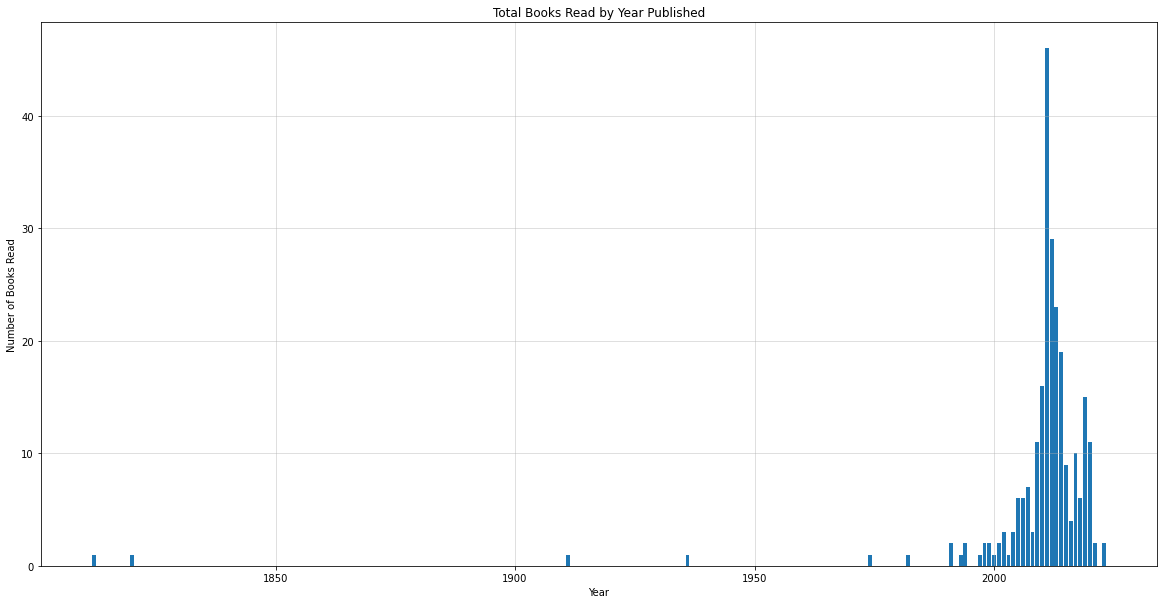

In [19]:
tmp = df.groupby(['Original Publication Year']).count()['Title']

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Total Books Read by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Books Read')
plt.grid(alpha=0.5)

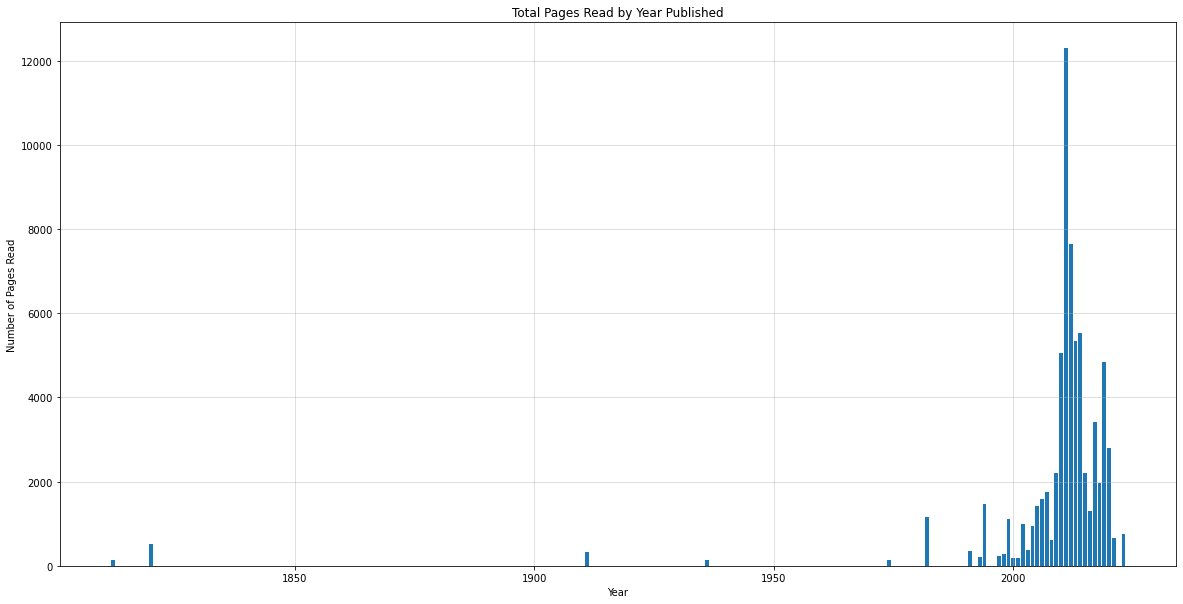

In [20]:
tmp = df.groupby(['Original Publication Year']).sum()['Number of Pages']

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Total Pages Read by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Pages Read')
plt.grid(alpha=0.5)

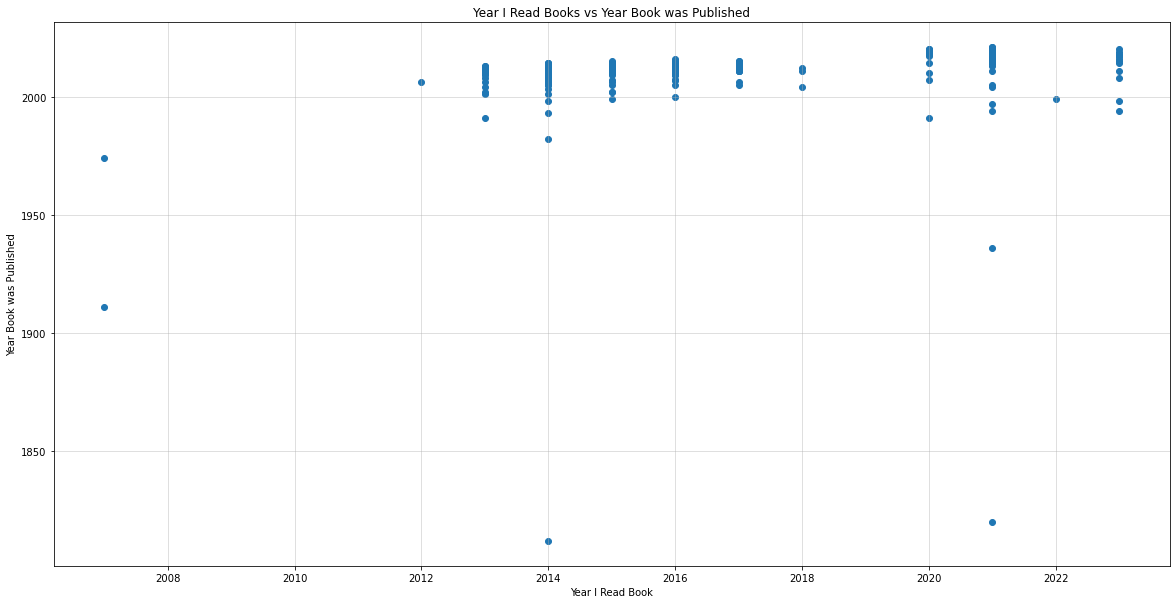

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(df['Year Read'], df['Original Publication Year'])
plt.title('Year I Read Books vs Year Book was Published')
plt.xlabel('Year I Read Book')
plt.ylabel('Year Book was Published')
plt.grid(alpha=0.5)

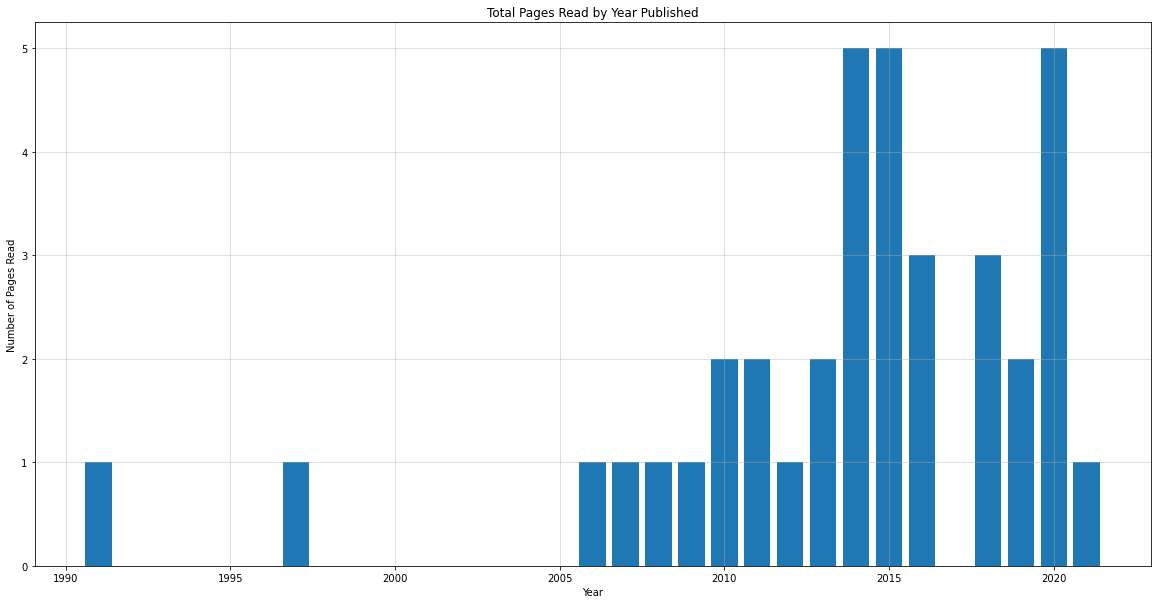

In [36]:
tmp = df[df['fiction_status']=='non-fiction'].groupby(['Year Published'])['fiction_status'].count()

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Number of Non-Fiction Books Read by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Non-Fiction Books Read')
plt.grid(alpha=0.5)

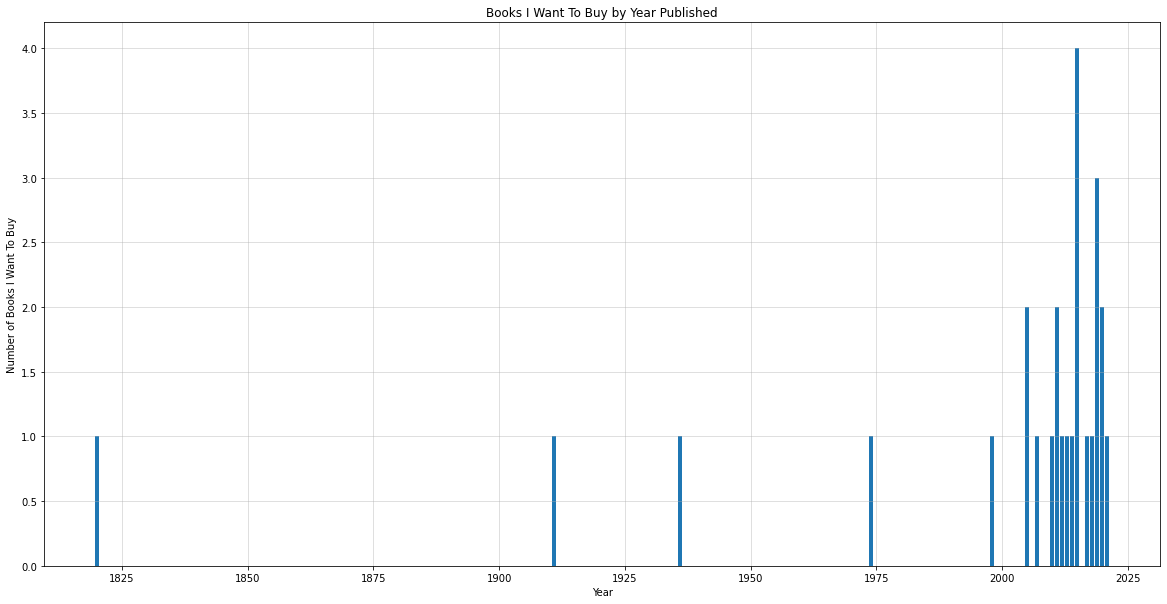

In [34]:
tmp = df[df['buy?']=='y'].groupby(['Original Publication Year'])['buy?'].count()

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Books I Want To Buy by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Books I Want To Buy')
plt.grid(alpha=0.5)